# Two-Layer Neural Networks

In this part of the homework, we will work on building a simple Neural Network to classify digits using MNIST dataset. There are many powerful neural network frameworks nowadays that are relatively straightforward to use. However, we believe that in order to understand the theory behind neural networks, and to have the right intuitions in order to build, use, and debug more complex architectures, one must first start from the basics.

Your task is to complete the missing codes needed for training and testing of a simple fully-connected neural network.

The missing parts will be marked with **Tx.**, where `x` represents the task number.

Many parts in this homework are modified from `Stanford's CS231n` assignments.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Set default configuration of plots.
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

from cattern.neural_net import TwoLayerNet

%load_ext autoreload
%autoreload 2

In [2]:
# Just a function that verifies if your answers are correct.

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cattern/neural_net.py` to represent instances of our network.

The network parameters (weights and biases) are stored in the instance variable `self.params` where the keys are parameter names and values are numpy arrays.

Below, we initialize some toy data and a toy model that will guide you with your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [4]:
print(X.shape)
print(y.shape)

(5, 4)
(5,)


# **Forward Pass:** Compute Scores
Open the file `cattern/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Complete **T5.** in `TwoLayerNet.loss`, by implementing the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. The scores refer to the output of the network just before the softmax layer.

In [5]:
scores = net.loss(X)
print("Your scores:")
print(scores)

print()

print("Correct scores:")
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]
])
print(correct_scores)

print()

# The difference should be very small. We get < 1e-7
print("Difference between your scores and correct scores: ", end="")
print(f"{np.sum(np.abs(scores - correct_scores)):.8f}")

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores: 0.00000004


# **Forward Pass:** Compute Loss
In the same function, complete **T6.** by implementing the second part that computes the data and regularization loss.

In [6]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

print(f"Your loss:")
print(loss)

print()

print("Correct loss:")
print(correct_loss)

print()

# Should be very small, we get < 1e-12
print("Difference between your loss and correct loss: ", end="")
print(f"{np.sum(np.abs(loss - correct_loss)):.13f}")

Your loss:
1.3037878913298202

Correct loss:
1.30378789133

Difference between your loss and correct loss: 0.0000000000002


# **Backward Pass**
Implement the rest of the function by completing **T7.**
This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cattern.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print("%s max relative error: %e" % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# **Train The Network**
To train the network we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure **(T8. T9. T10.)**. You will also have to implement `TwoLayerNet.predict` **(T11.)**, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.05.

Final training loss:  0.01714364353292381


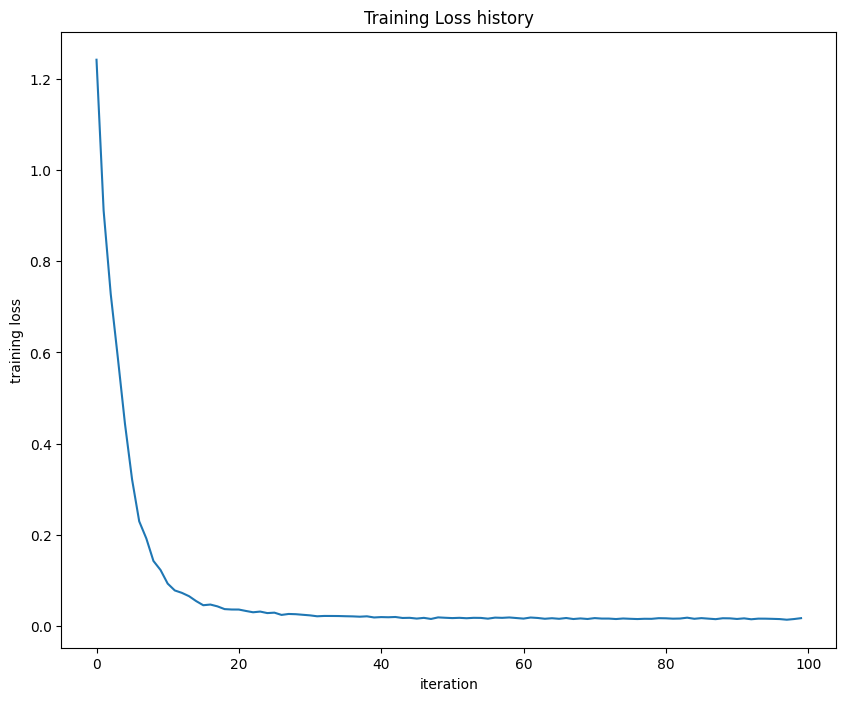

In [8]:
net = init_toy_model()
stats = net.train(
    X, y, X, y,
    learning_rate=1e-1,
    reg=5e-6,
    num_iters=100,
    verbose=False
)

print("Final training loss: ", stats["loss_history"][-1])

# plot the loss history
plt.plot(stats["loss_history"])
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.title("Training Loss history")
plt.show()

# **Load the data**
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up MNIST data so we can use it to train a classifier on a real dataset.

In [9]:
from mnist_data import load_mnist


def get_mnist_data(num_training=55000, num_validation=5000, num_test=10000):
    """
    Load the MNIST dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier.
    """
    # Load the raw MNIST data
    X_train, y_train, X_val, y_val, X_test, y_test = load_mnist.read_data_sets("mnist_data")

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train = X_train - mean_image
    X_val = X_val - mean_image
    X_test = X_test - mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_mnist_data()
print("Train data shape: ", X_train.shape)
print("Train labels shape: ", y_train.shape)
print("Validation data shape: ", X_val.shape)
print("Validation labels shape: ", y_val.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Train data shape:  (55000, 784)
Train labels shape:  (55000,)
Validation data shape:  (5000, 784)
Validation labels shape:  (5000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


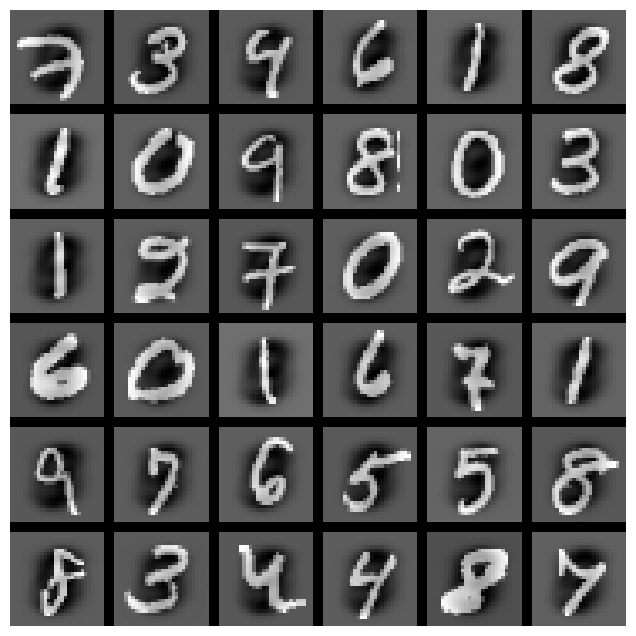

In [10]:
from mnist_data.vis_utils import visualize_grid

# Visualize mnist data

def show_mnist_image(data):
  data = data.reshape(-1, 28, 28, 1)
  plt.imshow(visualize_grid(data, padding=3).astype("uint8").squeeze(axis=2))
  plt.gca().axis("off")
  plt.show()

show_mnist_image(X_train[:36])

# **Train a Network**
To train our network we will use SGD with momentum. We will use fixed learning rate to train this model.

In [11]:
input_size = 28 * 28 * 1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(
    X_train, y_train, X_val, y_val,
    num_iters=2000,
    batch_size=200,
    learning_rate=1e-4,
    learning_rate_decay=1,
    reg=0,
    verbose=True
)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print("Validation accuracy: ", val_acc)

iteration 0 / 2000: loss 2.302592
iteration 100 / 2000: loss 2.302232
iteration 200 / 2000: loss 2.300876
iteration 300 / 2000: loss 2.291126
iteration 400 / 2000: loss 2.239348
iteration 500 / 2000: loss 2.008828
iteration 600 / 2000: loss 1.814898
iteration 700 / 2000: loss 1.425479
iteration 800 / 2000: loss 1.268225
iteration 900 / 2000: loss 0.994899
iteration 1000 / 2000: loss 0.847616
iteration 1100 / 2000: loss 0.758159
iteration 1200 / 2000: loss 0.633341
iteration 1300 / 2000: loss 0.536447
iteration 1400 / 2000: loss 0.478063
iteration 1500 / 2000: loss 0.397137
iteration 1600 / 2000: loss 0.415201
iteration 1700 / 2000: loss 0.385851
iteration 1800 / 2000: loss 0.517132
iteration 1900 / 2000: loss 0.425830
Validation accuracy:  0.8922


# **Learning Rate Decay**

In the previous run, we used the same learning rate during the whole training process. This fix-sized learning rate disregards the benefit of larger learning rate at the beginning of the training, and it might suffer from overshooting around the minima.

Add learning rate decay to the train function, run the model again with larger starting learning rate and learning rate decay, then compare the losses.

In [12]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats_LRDecay = net.train(
    X_train, y_train, X_val, y_val,
    num_iters=2000,
    batch_size=200,
    learning_rate=5e-4,
    learning_rate_decay=0.95,
    reg=0,
    verbose=True
)

# Predict on the validation set
val_acc_LRDecay = (net.predict(X_val) == y_val).mean()
print("Validation accuracy: ", val_acc_LRDecay)

iteration 0 / 2000: loss 2.302581
iteration 100 / 2000: loss 2.119326
iteration 200 / 2000: loss 0.804760
iteration 300 / 2000: loss 0.492363
iteration 400 / 2000: loss 0.407158
iteration 500 / 2000: loss 0.286767
iteration 600 / 2000: loss 0.318665
iteration 700 / 2000: loss 0.363674
iteration 800 / 2000: loss 0.273462
iteration 900 / 2000: loss 0.278906
iteration 1000 / 2000: loss 0.263698
iteration 1100 / 2000: loss 0.181063
iteration 1200 / 2000: loss 0.257531
iteration 1300 / 2000: loss 0.353448
iteration 1400 / 2000: loss 0.188915
iteration 1500 / 2000: loss 0.165813
iteration 1600 / 2000: loss 0.248227
iteration 1700 / 2000: loss 0.259703
iteration 1800 / 2000: loss 0.292172
iteration 1900 / 2000: loss 0.196248
Validation accuracy:  0.9432


# **Debug the Training**
With the default parameters we provided above, you should get a validation accuracy of about 0.94 on the validation set. This isn't very good for MNIST data which has reports of up to 0.99 accuracy.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. 

(You can think of the first layer weights as a projection $W^T X$. This is very similar to how we project our training data using PCA projection in our previous homework. Just like how we visualize the eigenfaces. We can also visualize the weights of the neural network in the same manner.)

Below, we will also show you lossed between two models we trained above. Do you notice the difference between the two?

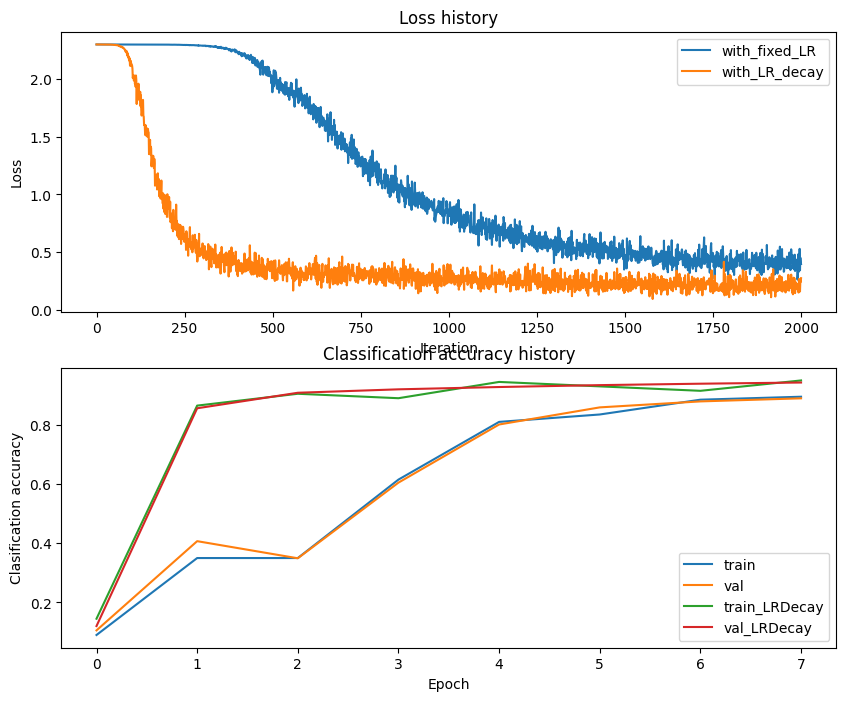

In [13]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats["loss_history"], label="with_fixed_LR")
plt.plot(stats_LRDecay["loss_history"], label="with_LR_decay")
plt.title("Loss history")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
plt.plot(stats["train_acc_history"], label="train")
plt.plot(stats["val_acc_history"], label="val")
plt.plot(stats_LRDecay["train_acc_history"], label="train_LRDecay")
plt.plot(stats_LRDecay["val_acc_history"], label="val_LRDecay")
plt.title("Classification accuracy history")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Clasification accuracy")
plt.show()

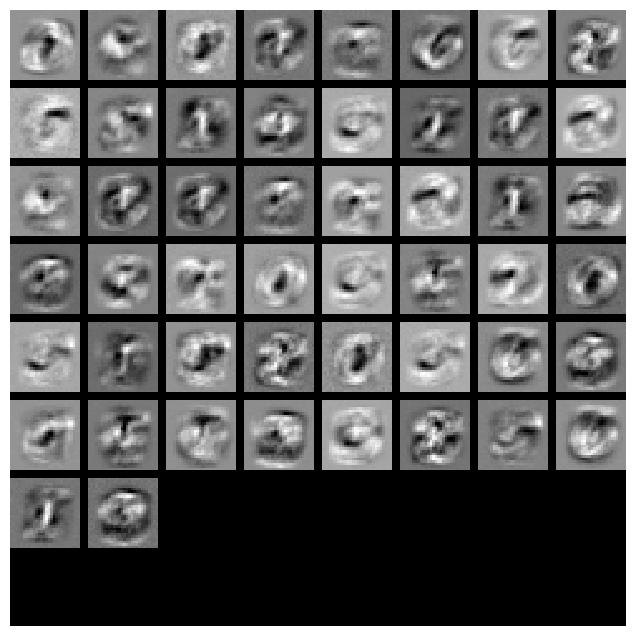

In [14]:
# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params["W1"]
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8").squeeze(axis=2))
    plt.gca().axis("off")
    plt.show()

show_net_weights(net)

# **Tune Your Hyperparameters**

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 97.4% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on MNIST as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [ ]:
################################################################################
# T12: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                           #
#                                                                              #
# To help debug your network, it may help to use visualizations similar to the #
# ones we used above; these visualizations will have significant qualitative   #
# differences from the ones we saw above for the poorly tuned network.         #
#                                                                              #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to #
# write code to sweep through possible combinations of hyperparameters         #
# automatically like we did on the previous exercises.                         #
################################################################################

# Store the best model into this variable.
best_net = TwoLayerNet(input_size, 200, num_classes)
stats_best_net = best_net.train(
    X_train, y_train, X_val, y_val,
    num_iters=4000,
    batch_size=300,
    learning_rate=1e-3,
    learning_rate_decay=0.95,
    reg=0,
    verbose=True
)

# Predict on the validation set
val_acc_best_net = (best_net.predict(X_val) == y_val).mean()
print("Validation accuracy: ", val_acc_best_net)

#################################################################################
#                                  END OF T12                                   #
#################################################################################

iteration 0 / 4000: loss 2.302595
iteration 100 / 4000: loss 0.698376
iteration 200 / 4000: loss 0.412657
iteration 300 / 4000: loss 0.296848
iteration 400 / 4000: loss 0.244699
iteration 500 / 4000: loss 0.287703
iteration 600 / 4000: loss 0.189672
iteration 700 / 4000: loss 0.194406
iteration 800 / 4000: loss 0.165330
iteration 900 / 4000: loss 0.173304
iteration 1000 / 4000: loss 0.114969
iteration 1100 / 4000: loss 0.172537
iteration 1200 / 4000: loss 0.197263
iteration 1300 / 4000: loss 0.137189
iteration 1400 / 4000: loss 0.206309
iteration 1500 / 4000: loss 0.201528
iteration 1600 / 4000: loss 0.104132
iteration 1700 / 4000: loss 0.096440
iteration 1800 / 4000: loss 0.077341
iteration 1900 / 4000: loss 0.134956
iteration 2000 / 4000: loss 0.155198
iteration 2100 / 4000: loss 0.105741
iteration 2200 / 4000: loss 0.109886
iteration 2300 / 4000: loss 0.090519
iteration 2400 / 4000: loss 0.075001
iteration 2500 / 4000: loss 0.123460
iteration 2600 / 4000: loss 0.083451
iteration 270

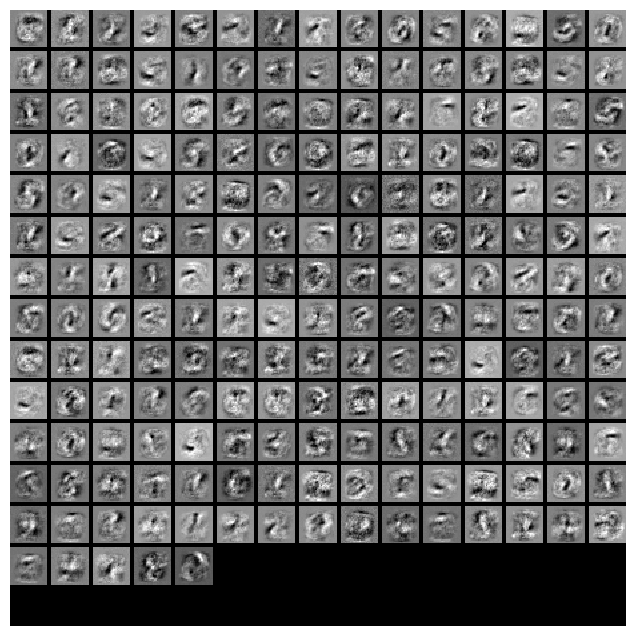

In [16]:
# visualize the weights of the best network
show_net_weights(best_net)

# **Run On The Test Set**
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 96.3%.

In [17]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print("Test accuracy: ", test_acc)

Test accuracy:  0.974


---